## NOSQL DB's

### Types
1. key value pair --(Redis,DynamoDB)
2. Document DB --(MongoDB,DynamoDM)
3. Grpah database -- (Neo4J, Neptune)
4. COlumnr Storage --(Hbase, CouchDB)

### About Dynamo
1. Web scale application
2. Schemaless
3. manage structure and unstructured
4. managed,Scalable, distributed cluster, servereless
5. Use API to read and write into db (http request)
6. Transaction support (ACID)
7. In tranx two action happens(one for prepare tranx, another for commit tranx)
8. Can we create relationship between tables
9. For cacheing use DAX for reading cache
10. Automatically spread data into different paritions (raises throughput)
11. Encryption at rest (data)
12. supports JSON, XML, and HTML

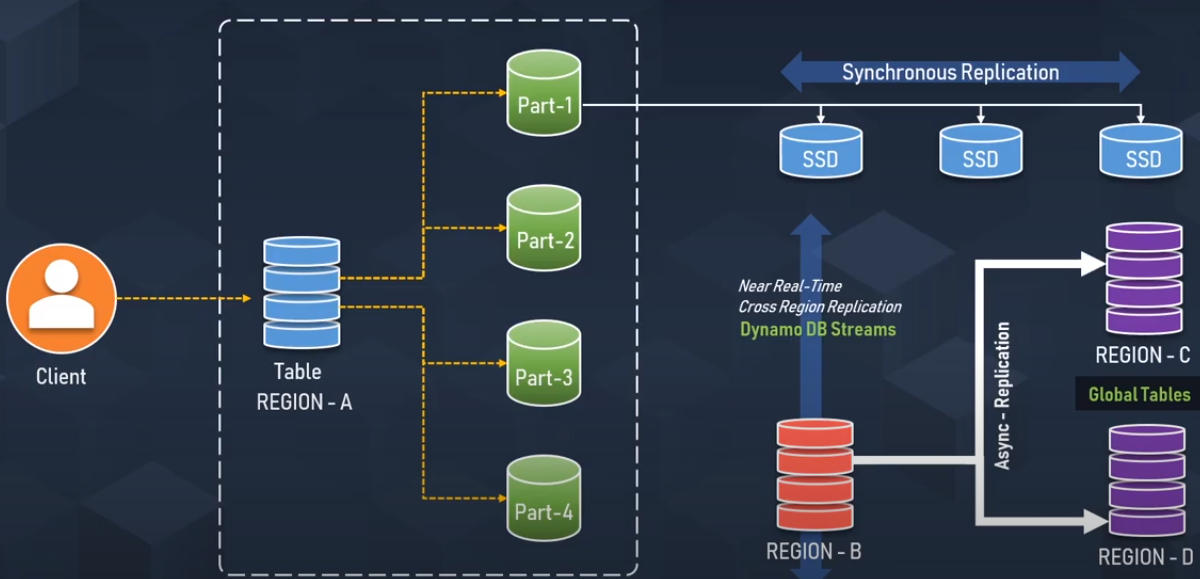

In [1]:
from IPython.display import Image
Image(filename='image2.png')

### About Availability 
1. Partitions are allocation of storage backed by SSD
2. all these partitions are getting replicated in multiple AZ within a region using (synchronous replication)

### DynamoDb streams 
1. near realtime cross region replication from one region to another 
2. used to find the changes made in the table and send email or creare dashboard using this (ex: new cust signed in or total count), create the audit table using this

### Async replication
1. if we need data need to be replicated in multiple regions
2. which is called Global tables

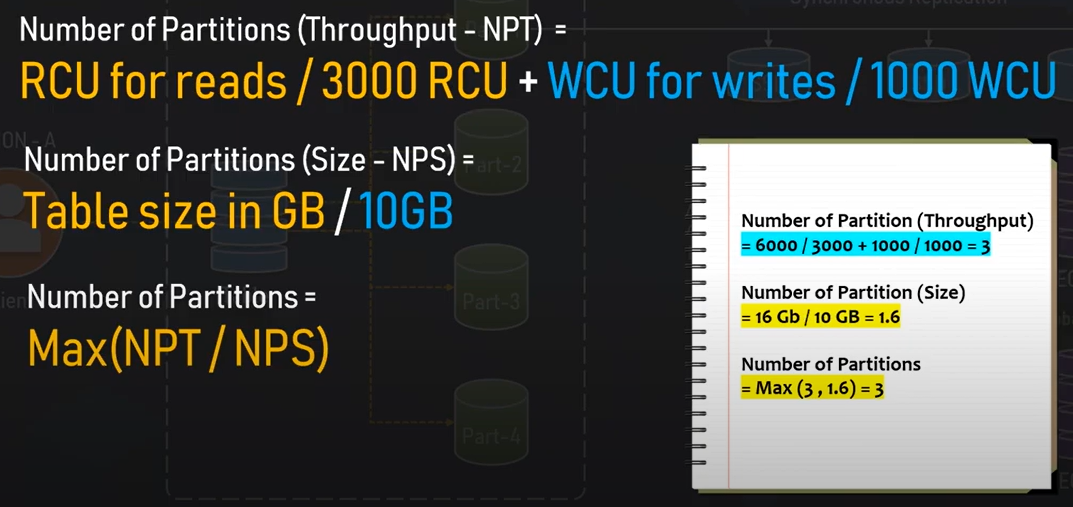

In [2]:
from IPython.display import Image
Image(filename='image1.png')

### How many partitions do we required (How its calculated)

1. two things to calculate (throughput(NPT) and size(NPS))

##### For strongly consistent model
#####
NPT
1. one read file has 4Kb (for example) -so it required 1 RCU 
2. Formula =  (RCU for read/3000 RCU) + (WCU for write/1000 WCU)
3. in our case (6000/3000)+(1000/1000) = 3
#### 
NPS 
1. table size in GB/ 10 GB
2. in our case -(16 GB/10 GB) = 1.6
#### 
No of partitions 
1. Max(3/1.6) =3 
so 3 partition required


##  Consistency model
##### Eventually consistent mode(read before write);
1.  Not immediately data get stored, it would give recent data
2.  two 4 kb files is considered as 1 RCU,1 WCU

##### Strongly conistent model (read after write)

1.  Immediately data get stored, it returns most up to date  data
2.  one 4 kb file requires 1 RCU, 1 WCU



### Data models 
1. Tables (non relational tables mostly)
2. Items (Rows-contains primary key)
3. Attributes (key value pair)

### DataTypes
1. Scalar (Number, String, Binary, Boolean, Null)
2. Multi-valued -String Set, Number set, Binary Set
3. Documnet - List and Map

## Primary keys (Schema Design) - choosing right key structure
##### Simple (only partition key)

##### Composite primary key (partition and sort key)

##### Local secondary Index (LSI)
1. used to Query within table fast
2. not to merge another table
3. It uses the same partition key
4. uses same partition and different sort key

#####  Global secondary index (GSI)
1. completely different primary key
2. For performance
3. to read only few columns , create index with those columns
4. A Global Secondary Index allows you to query attributes not part of the main table’s primary key
5. This will help you avoid the slowness and inefficiencies associated with a full table scan operation.
6. it will be organized by a primary key of its own, enabling faster queries.

## Follow this to install dynamodb

#### Follow the below commands to install docker in local machine  -(windows)-in cmd
1. docker network create dynamo-local-network
2. docker run -d -p 8000:8000 --network=dynamo-local-network --name dynamo-local amazon/dynamodb-local -jar DynamoDBLocal.jar -sharedDb
3. docker start dynamo-local

4. aws dynamodb list-tables --endpoint-url http://localhost:8000
        
        
        

In [3]:
## make sure in docker desktop (application) is running in UI, else click start in docker desktop console

#### Just like how we use MySQL Workbench to access MySQL database in GUI, AWS offers a workbench for DynamoDB called NoSQL Workbench

#Install it from here — 
##### https://docs.aws.amazon.com/amazondynamodb/latest/developerguide/workbench.settingup.html

In [4]:
## After installation, open NoSQL Workbench 
## → Operation Builder from Left Side Menu 
## -> Click Add Connection Button 
## -> In the Add a new database connection popup, 
## choose DynamoDB Local tab 
## -> Hit Connect

In [5]:
#refer the below if you need any issues (Thanks for the guys who created these articles)
# https://iamvickyav.medium.com/aws-dynamodb-with-python-boto3-part-1-intro-to-dynamodb-local-installation-b168d9d762d5
## https://www.fernandomc.com/posts/ten-examples-of-getting-data-from-dynamodb-with-python-and-boto3/
#### https://hands-on.cloud/boto3-dynamodb-tutorial

## Connecting thru boto3.client and boto3.resource
-- use whatever required

In [6]:
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")

In [7]:
import boto3
## For a Boto3 client ('client' is for low-level access to Dynamo service API)
db_client = boto3.client('dynamodb', 
                         endpoint_url='http://localhost:8000', 
                         region_name='local')

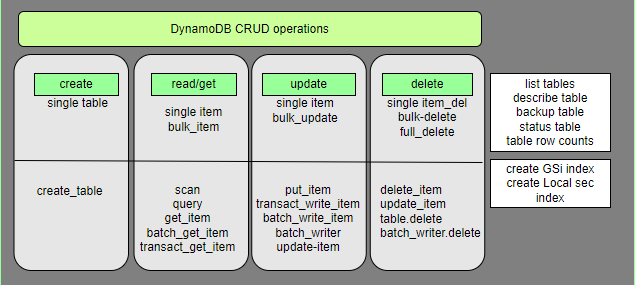

In [41]:
from IPython.display import Image
Image(filename='Screenshot 2023-05-17 145625.png')

## Create table 

In [10]:
# https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/dynamodb/client/create_table.html
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.create_table (
       TableName = 'Employees3',
       KeySchema = [
                       {
                           'AttributeName': 'Name',
                           'KeyType': 'HASH'
                       },
                       {
                           'AttributeName': 'Email',
                           'KeyType': 'RANGE'
                       }
                       ],
           AttributeDefinitions = [
                                   {
                                       'AttributeName': 'Name',
                                       'AttributeType': 'S'
                                   },
                                   {
                                       'AttributeName':'Email',
                                       'AttributeType': 'S'
                                   }
                                ],
            ProvisionedThroughput={
                                        'ReadCapacityUnits':1,
                                        'WriteCapacityUnits':1
                                    }

    )
print(table)

dynamodb.Table(name='Employees3')


In [11]:
## inserting to run the queries 

In [12]:
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
with table.batch_writer() as batch:
    batch.put_item(Item={"Name": "vicc",
                         "Email": "john@handson.cloud",
                        "Department": "IT", 
                         "Section": { "QA": "QA-1", "Reporting Line": "L1" } })
    batch.put_item(Item={"Name": "deep",
                         "Email": "joshua@handson.cloud",
                            "Department": "IT", 
                         "Section": { "Development": "SD-1", "Reporting Line": "L1" } })
    batch.put_item(Item={"Name": "vaan",
                         "Email": "robert@handson.cloud",
                         "Department": "IT", 
                         "Section": { "PM": "PM-1", "Reporting Line": "L1" } })
print(batch)

## general table level commands

#### List tables

In [13]:
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
print(list(dynamodb.tables.all()))

[dynamodb.Table(name='Employees'), dynamodb.Table(name='Employees2'), dynamodb.Table(name='Employees3'), dynamodb.Table(name='Student'), dynamodb.Table(name='Student1'), dynamodb.Table(name='Student2'), dynamodb.Table(name='TryDaxTable2'), dynamodb.Table(name='TryDaxTable3'), dynamodb.Table(name='TryDaxTable4'), dynamodb.Table(name='mytable'), dynamodb.Table(name='mytable2'), dynamodb.Table(name='mytable22'), dynamodb.Table(name='mytable24'), dynamodb.Table(name='sample-movie-table-resource'), dynamodb.Table(name='vimal')]


In [14]:
db_client = boto3.client('dynamodb', 
                         endpoint_url='http://localhost:8000', 
                         region_name='local')
response = db_client.list_tables()
print(response)

{'TableNames': ['Employees', 'Employees2', 'Employees3', 'Student', 'Student1', 'Student2', 'TryDaxTable2', 'TryDaxTable3', 'TryDaxTable4', 'mytable', 'mytable2', 'mytable22', 'mytable24', 'sample-movie-table-resource', 'vimal'], 'ResponseMetadata': {'RequestId': 'e78a5171-f6f2-41d9-b5dc-6be3a5c04d6c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:31 GMT', 'x-amzn-requestid': 'e78a5171-f6f2-41d9-b5dc-6be3a5c04d6c', 'content-type': 'application/x-amz-json-1.0', 'x-amz-crc32': '929413219', 'content-length': '214', 'server': 'Jetty(9.4.48.v20220622)'}, 'RetryAttempts': 0}}


#### describe



In [15]:
import boto3
table = dynamodb.Table('Employees')
print(table.item_count)

13


In [16]:
import boto3
dynamoDBClient = boto3.client('dynamodb',
                          aws_access_key_id="dummy",
                          aws_secret_access_key="dummy",
                          region_name="local",
                          endpoint_url="http://localhost:8000")
table = dynamoDBClient.describe_table(
    TableName='Employees'
)
print(table)

{'Table': {'AttributeDefinitions': [{'AttributeName': 'Name', 'AttributeType': 'S'}, {'AttributeName': 'Email', 'AttributeType': 'S'}], 'TableName': 'Employees', 'KeySchema': [{'AttributeName': 'Name', 'KeyType': 'HASH'}, {'AttributeName': 'Email', 'KeyType': 'RANGE'}], 'TableStatus': 'ACTIVE', 'CreationDateTime': datetime.datetime(2023, 5, 17, 14, 26, 10, 949000, tzinfo=tzlocal()), 'ProvisionedThroughput': {'LastIncreaseDateTime': datetime.datetime(1970, 1, 1, 0, 0, tzinfo=tzwinlocal()), 'LastDecreaseDateTime': datetime.datetime(1970, 1, 1, 0, 0, tzinfo=tzwinlocal()), 'NumberOfDecreasesToday': 0, 'ReadCapacityUnits': 1, 'WriteCapacityUnits': 1}, 'TableSizeBytes': 572, 'ItemCount': 13, 'TableArn': 'arn:aws:dynamodb:ddblocal:000000000000:table/Employees'}, 'ResponseMetadata': {'RequestId': '9d2f7e5b-1616-4396-bd10-d34a241f581d', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:32 GMT', 'x-amzn-requestid': '9d2f7e5b-1616-4396-bd10-d34a241f581d', 'content-type': 'app

In [17]:
import boto3
ddb = boto3.resource('dynamodb',
                          aws_access_key_id="dummy",
                          aws_secret_access_key="dummy",
                          region_name="local",
                          endpoint_url="http://localhost:8000")
table = ddb.Table('Employees')
attrs = table.attribute_definitions
attrs

[{'AttributeName': 'Name', 'AttributeType': 'S'},
 {'AttributeName': 'Email', 'AttributeType': 'S'}]

#### backup

In [18]:
# import boto3
# dynamoDBClient = boto3.client('dynamodb',
#                           aws_access_key_id="dummy",
#                           aws_secret_access_key="dummy",
#                           region_name="local",
#                           endpoint_url="http://localhost:8000")
# response = dynamoDBClient.create_backup(
#     TableName='Employees',
#     BackupName='Employees-Backup-01'
# )
# print(response)

#### status

In [19]:
import boto3

table = dynamodb.Table('Employees')
print(f'Table status: {table.table_status}')

Table status: ACTIVE


## Get/ read items

1. Query requires a partition key --1MB max
2. BatchGetItems requires a primary key --16MB or 100 items in a response

#### get item

In [20]:
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
# boto3 dynamodb getitem
response = table.get_item(
    Key={
        'Name': 'Lugugo Joshua',
        'Email': 'joshua@handson.cloud'
    }
)
print(response)
#print(response['Name'])

{'ResponseMetadata': {'RequestId': '26aa43cf-b7a9-4660-b421-837f36c865e1', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:35 GMT', 'x-amzn-requestid': '26aa43cf-b7a9-4660-b421-837f36c865e1', 'content-type': 'application/x-amz-json-1.0', 'x-amz-crc32': '2745614147', 'content-length': '2', 'server': 'Jetty(9.4.48.v20220622)'}, 'RetryAttempts': 0}}


#### Scan

In [21]:
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
response = table.scan()
response['Items']
print(response)

{'Items': [{'Name': 'vimal2', 'Email': 'vimald8959@gmail.com'}, {'Department': 'Mech', 'Email': 'country', 'Name': 'vim'}, {'Department': 'Mech', 'Name': 'vim', 'Email': 'email1'}, {'Department': 'IT', 'Email': 'john@handson.cloud', 'Section': {'QA': 'QA-1', 'Reporting Line': 'L1'}, 'Name': 'vicc'}, {'Department': 'manjunath', 'Name': 'amn', 'Email': 'gloud'}, {'Department': 'unknown', 'Name': 'vic', 'Email': 'email3'}, {'Department': 'IT', 'Email': 'robert@handson.cloud', 'Section': {'PM': 'PM-1', 'Reporting Line': 'L1'}, 'Name': 'vaan'}, {'Department': 'kinkong', 'Email': 'john@handson.cloud', 'Name': 'Luzze John'}, {'Email': 'gmail', 'Name': 'sun'}, {'Department': 'Monkey', 'Email': 'gmaill', 'Name': 'sun'}, {'Department': 'IT', 'Email': 'joshua@handson.cloud', 'Section': {'Development': 'SD-1', 'Reporting Line': 'L1'}, 'Name': 'deep'}, {'Name': 'vimal', 'Email': 'vimaldharmalingam@gmail.com'}, {'Name': 'a', 'Email': 'b'}], 'Count': 13, 'ScannedCount': 13, 'ResponseMetadata': {'Requ

In [22]:
import boto3
from boto3.dynamodb.conditions import Key, Attr
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
response = table.scan(FilterExpression=Attr('Department').eq('IT'))
print("The query returned the following items:")
for item in response['Items']:
    print(item)

The query returned the following items:
{'Department': 'IT', 'Email': 'john@handson.cloud', 'Section': {'QA': 'QA-1', 'Reporting Line': 'L1'}, 'Name': 'vicc'}
{'Department': 'IT', 'Email': 'robert@handson.cloud', 'Section': {'PM': 'PM-1', 'Reporting Line': 'L1'}, 'Name': 'vaan'}
{'Department': 'IT', 'Email': 'joshua@handson.cloud', 'Section': {'Development': 'SD-1', 'Reporting Line': 'L1'}, 'Name': 'deep'}


#### Query

In [23]:
import boto3
from boto3.dynamodb.conditions import Key
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
# boto3 ddb query
response = table.query(KeyConditionExpression=Key('Name').eq('Luzze John'))
print("The query returned the following items:")
for item in response['Items']:
    print(item)

The query returned the following items:
{'Department': 'kinkong', 'Email': 'john@handson.cloud', 'Name': 'Luzze John'}


#### batch get items

In [24]:
## different samples
## https://www.gcptutorials.com/post/how-to-create-dynamodb-table-using-python-boto3
## https://www.gcptutorials.com/post/how-to-get-item-from-dynamodb-table-using-python

In [25]:
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")

response = dynamodb.batch_get_item(
        RequestItems={
            'Employees': {
                'Keys': [
                    {
                        'Name': 'Luzze John'  ,'Email':'john@handson.cloud'
                    },
                ],
                'ConsistentRead': True
            }
        },
        ReturnConsumedCapacity='TOTAL'
    )
items = response['Responses']['Employees']
print(items)
# Process the retrieved items
for item in items:
    # Access item attributes
    attribute_value = item['Email']
    # Process the attribute value as needed

[{'Department': 'kinkong', 'Email': 'john@handson.cloud', 'Name': 'Luzze John'}]


####  transact_get_item



In [26]:
import boto3
db_client = boto3.client('dynamodb', 
                         endpoint_url='http://localhost:8000', 
                         region_name='local')

response = db_client.transact_get_items(
    TransactItems=[
        {
            'Get': {
                'TableName': 'Employees',
                        'Key': {
                            'Email': {'S':'john@handson.cloud'},
                            'Name' :{'S':'Luzze John'}
                },
                # 'ProjectionExpression': 'attribute_name, attribute_name, ...',
                # 'ConsistentRead': True
            }
        },
        # Add more Get operations for additional items
        # {
        #     'Get': {
        #         'TableName': 'YourTableName',
        #         'Key': {
        #             'PrimaryKeyAttributeName': {'S': 'PrimaryKeyAttributeValue'}
        #         }
        #     }
        # },
    ]
)

items = response['Responses']
print(items)
# Process the retrieved items
for item in items:
    attribute_value = item['Item']['Name']
    # Process the attribute value as needed

[{'Item': {'Department': {'S': 'kinkong'}, 'Email': {'S': 'john@handson.cloud'}, 'Name': {'S': 'Luzze John'}}}]


## Put / Write item

#### put item single item

In [27]:
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
table.put_item(Item={
        'Name': 'vimal2',
        'Email': 'vimald8959@gmail.com'
            })

{'ResponseMetadata': {'RequestId': '69ba24ff-12a7-4cae-b048-32baaaf306dc',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:40 GMT',
   'x-amzn-requestid': '69ba24ff-12a7-4cae-b048-32baaaf306dc',
   'content-type': 'application/x-amz-json-1.0',
   'x-amz-crc32': '2745614147',
   'content-length': '2',
   'server': 'Jetty(9.4.48.v20220622)'},
  'RetryAttempts': 0}}

#### batch_writer

In [28]:
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
response = table.put_item(
    Item = { 
        'Name': 'vimal',
        'Email': 'vimaldharmalingam@gmail.com'
    }
)
print(response)

{'ResponseMetadata': {'RequestId': '5c339992-d2ef-4e73-9f75-d4acff9c82e8', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:40 GMT', 'x-amzn-requestid': '5c339992-d2ef-4e73-9f75-d4acff9c82e8', 'content-type': 'application/x-amz-json-1.0', 'x-amz-crc32': '2745614147', 'content-length': '2', 'server': 'Jetty(9.4.48.v20220622)'}, 'RetryAttempts': 0}}


#### batch_write_item

####
1. supports both put and delete operations
2. Each request can write up to 100 items, and each item can be up to 400 KB in size
3. You can only write items to a single table in each request.
4. You cannot use filters when writing items (e.g., you cannot specify a condition expression).
5. All items in the request must belong to the same partition primary key value.
6. You cannot update an existing item; you can only insert or delete new items. If you need to update an item, you must delete it and then insert a new item with the updated data.

####
1. Allows max of 25 delete or put or max 16MB

In [30]:
resource = boto3.resource('dynamodb', endpoint_url='http://localhost:8000')

mytable = resource.create_table(
    TableName='mytable242',
    KeySchema=[{ 'AttributeName': 'name', 'KeyType': 'HASH' }],
    AttributeDefinitions=[{ 'AttributeName': 'name', 'AttributeType': 'S' }],
    ProvisionedThroughput={ 'ReadCapacityUnits': 5, 'WriteCapacityUnits': 5 }
)

try:
    resource.batch_write_item(RequestItems={
        'mytable': [{ 'PutRequest': { 'Item': {
            'name': { 'S': 'myname' },
            'value': { 'S': 'myvalue' }
        }}}]
    })
    print(f'resource, specify all types : write succeeded.')
except Exception as e:
    print(f'resource, specify all types : write failed: {e}')

try:
    resource.batch_write_item(RequestItems={
        'mytable': [{ 'PutRequest': { 'Item': {
            'name': 'myname',
            'value': { 'S': 'myvalue' }
        }}}]
    })
    print(f'resource, specify value only: write succeeded.')
except Exception as e:
    print(f'resource, specify value only: write failed: {e}')

try:
    resource.batch_write_item(RequestItems={
        'mytable': [{ 'PutRequest': { 'Item': {
            'name': 'myname',
            'value': 'myvalue'
        }}}]
    })
    print(f'resource, specify none      : write succeeded.')
except Exception as e:
    print(f'resource, specify none      : write failed: {e}')

resource, specify all types : write failed: An error occurred (ValidationException) when calling the BatchWriteItem operation: Invalid attribute value type
resource, specify value only: write succeeded.
resource, specify none      : write succeeded.


#### batch_writer

In [31]:
import boto3
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
with table.batch_writer() as batch:
    batch.put_item(Item={"Name": "vicc",
                         "Email": "john@handson.cloud",
                        "Department": "IT", 
                         "Section": { "QA": "QA-1", "Reporting Line": "L1" } })
    batch.put_item(Item={"Name": "deep",
                         "Email": "joshua@handson.cloud",
                            "Department": "IT", 
                         "Section": { "Development": "SD-1", "Reporting Line": "L1" } })
    batch.put_item(Item={"Name": "vaan",
                         "Email": "robert@handson.cloud",
                         "Department": "IT", 
                         "Section": { "PM": "PM-1", "Reporting Line": "L1" } })
print(batch)

In [32]:
dataa =[['vim','email1','Mech'],['amn','gloud','manjunath'],['vic','email3','unknown']]
### A single call to BatchWriteItem can write up to 16 MB of data, which can comprise as many as 25 put or delete requests. 
### Individual items to be written can be as large as 400 KB.
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
with table.batch_writer() as writer:
    for data in dataa:
        print(data)
        writer.put_item(Item={
            'Name': data[0],
            'Email': data[1],
            'Department': data[2]
        })

['vim', 'email1', 'Mech']
['amn', 'gloud', 'manjunath']
['vic', 'email3', 'unknown']


#### transact_write_item

In [33]:
import boto3
db_client = boto3.client('dynamodb', 
                         endpoint_url='http://localhost:8000', 
                         region_name='local')
db_client.transact_write_items(TransactItems=[
    {
        "Put": {
            "TableName": "Employees",
            "Item": {
                "Name": {"S": "a"},
                "Email": {"S": "b"}
            },
            "ReturnValuesOnConditionCheckFailure": "ALL_OLD",
        }
    }
])

{'ResponseMetadata': {'RequestId': '05929d4f-feb1-4ca2-bbfa-492c23f84fa1',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:50 GMT',
   'x-amzn-requestid': '05929d4f-feb1-4ca2-bbfa-492c23f84fa1',
   'content-type': 'application/x-amz-json-1.0',
   'x-amz-crc32': '2745614147',
   'content-length': '2',
   'server': 'Jetty(9.4.48.v20220622)'},
  'RetryAttempts': 0}}

## update item 
1. use this method to edit existing attribute
2. use to add or remove new data attributes.

#### update a single item

In [34]:
table = dynamodb.Table('Employees')
response = table.update_item(
        Key={
           'Name': 'vim',
            'Email': 'country'
        },
        UpdateExpression='SET Department = :s',
        ExpressionAttributeValues={':s': 'Mech' }
        
    )
print(response)

{'ResponseMetadata': {'RequestId': 'cf9a056d-8a30-4f88-a52c-f7f8cc7fd081', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:52 GMT', 'x-amzn-requestid': 'cf9a056d-8a30-4f88-a52c-f7f8cc7fd081', 'content-type': 'application/x-amz-json-1.0', 'x-amz-crc32': '2745614147', 'content-length': '2', 'server': 'Jetty(9.4.48.v20220622)'}, 'RetryAttempts': 0}}


#### batch update

In [35]:
keys =[('Luzze John','john@handson.cloud','kinkong'),('sun','gmaill','Monkey')]
table = dynamodb.Table('Employees')

for i in keys:
    print(i[0])
    response = table.update_item(
            Key={
                'Name': i[0],
                'Email': i[1]
            },
            UpdateExpression='SET Department = :s',
            ExpressionAttributeValues={':s': i[2] }

        )
    print(response)

Luzze John
{'ResponseMetadata': {'RequestId': '4147b844-ae07-4805-9f77-06dc1395e968', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:53 GMT', 'x-amzn-requestid': '4147b844-ae07-4805-9f77-06dc1395e968', 'content-type': 'application/x-amz-json-1.0', 'x-amz-crc32': '2745614147', 'content-length': '2', 'server': 'Jetty(9.4.48.v20220622)'}, 'RetryAttempts': 0}}
sun
{'ResponseMetadata': {'RequestId': 'b6adacc4-368a-44a6-9430-b1e0b6338e86', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:53 GMT', 'x-amzn-requestid': 'b6adacc4-368a-44a6-9430-b1e0b6338e86', 'content-type': 'application/x-amz-json-1.0', 'x-amz-crc32': '2745614147', 'content-length': '2', 'server': 'Jetty(9.4.48.v20220622)'}, 'RetryAttempts': 0}}


## delete item

In [36]:
table = dynamodb.Table('Employees')
response = table.delete_item(
    Key={
            'Name': 'vim',
            'Email': 'country'
    }
)
print(response)

{'ResponseMetadata': {'RequestId': '54ba12ef-8a27-4033-b69b-1fdd46c8b67c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:54 GMT', 'x-amzn-requestid': '54ba12ef-8a27-4033-b69b-1fdd46c8b67c', 'content-type': 'application/x-amz-json-1.0', 'x-amz-crc32': '2745614147', 'content-length': '2', 'server': 'Jetty(9.4.48.v20220622)'}, 'RetryAttempts': 0}}


In [37]:
## using update item we can delete only values
table = dynamodb.Table('Employees')
response = table.update_item(
    Key={
            'Name': 'sun',
            'Email': 'gmail'
    },
    UpdateExpression='REMOVE Department'
)

print(response)

{'ResponseMetadata': {'RequestId': '4b5467c8-5883-4460-83d2-7c2240f10e36', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:55 GMT', 'x-amzn-requestid': '4b5467c8-5883-4460-83d2-7c2240f10e36', 'content-type': 'application/x-amz-json-1.0', 'x-amz-crc32': '2745614147', 'content-length': '2', 'server': 'Jetty(9.4.48.v20220622)'}, 'RetryAttempts': 0}}


#### bulk delete

In [38]:
# only keys is enough to delete
keys =[('Luzze John','john@handson.cloud','kinkong'),('sun','gmaill','Monkey')]

table = dynamodb.Table('Employees')

with table.batch_writer() as writer:
    for student in keys:
        writer.delete_item(Key={
            'Name': student[0],
            'Email': student[1]

        })

## delete a table

In [39]:
dynamodb= boto3.resource('dynamodb',
                        aws_access_key_id="dummy",
                        aws_secret_access_key="dummy",
                        region_name="local",
                        endpoint_url="http://localhost:8000")
table = dynamodb.Table('Employees')
table.delete()

{'TableDescription': {'AttributeDefinitions': [{'AttributeName': 'Name',
    'AttributeType': 'S'},
   {'AttributeName': 'Email', 'AttributeType': 'S'}],
  'TableName': 'Employees',
  'KeySchema': [{'AttributeName': 'Name', 'KeyType': 'HASH'},
   {'AttributeName': 'Email', 'KeyType': 'RANGE'}],
  'TableStatus': 'ACTIVE',
  'CreationDateTime': datetime.datetime(2023, 5, 17, 14, 26, 10, 949000, tzinfo=tzlocal()),
  'ProvisionedThroughput': {'LastIncreaseDateTime': datetime.datetime(1970, 1, 1, 0, 0, tzinfo=tzwinlocal()),
   'LastDecreaseDateTime': datetime.datetime(1970, 1, 1, 0, 0, tzinfo=tzwinlocal()),
   'NumberOfDecreasesToday': 0,
   'ReadCapacityUnits': 1,
   'WriteCapacityUnits': 1},
  'TableSizeBytes': 451,
  'ItemCount': 10,
  'TableArn': 'arn:aws:dynamodb:ddblocal:000000000000:table/Employees'},
 'ResponseMetadata': {'RequestId': 'ad484e81-13d8-42ef-a438-ea5261763dc7',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Wed, 17 May 2023 13:32:57 GMT',
   'x-amzn-requestid': 'ad

## Tips
#######  https://www.youtube.com/watch?v=Ml4AWGwUv7I&list=PL9nWRykSBSFi5QD8ssI0W5odL9S0309E2&index=24
1.  Avoid Scanning (costly)
2. pre-join 1-many relationship tables (customerid as partition key, order id as Sort key) 
3. item sizes and Pagination - (normally it gives 1 MB data which might be top 45 rows), if we want to see all data use LastEvaluated key parameter to retrive all data to see. this key will be used for "there are more data in a table" and run a subsequent query to fetch all data
4. USE GSI and projections - max 20 GSi possible, its expensive because it increase data size, (index with country column and projection means use only required columns in GSI)
######## https://www.youtube.com/watch?v=XvD2FrS5yYM&list=PL9nWRykSBSFi5QD8ssI0W5odL9S0309E2&index=2
5. in a single partition, max 3000 RCU, 1000 WCU possible (if we have 10000 RCU and 3 partitions, 3000* 3 partition) remaining we will get throttled

### For more commands 

In [40]:
## https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/dynamodb.html